# BIA 6303 - Homework 2

# Eric Long

### Data Selection:

The dataset that I am using for this assignment is the popular "Adult" dataset. This data is used to predict whether an individual's income is above or below $50k based on the attributes provided in the dataset. The data files and column descriptions are available at http://archive.ics.uci.edu/ml/datasets/Adult.

The dataset contains 48842 rows total, 45222 with complete data. This information is provided at the above website, specifically in the adult.names file. This file also serves as a good "double-check" for row counts after preprocessing the data.

Something important to note: this dataset has already been broken up into training and testing data, using a 67/33 split. I will leave the data split this way.

Another important note: the 'fnlwgt' variable is described in the adult.names file mentioned above (and is rather complex). For the purpose of this assignment this variable will be taken 'as-is'. The variable takes demographics into consideration (by residence state) so poeple with similar characteristics will have similar weights.

## Environmental Setup and Data Import

In [1]:
#environmental setup
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#increase lines of output (for troubleshooting)
pd.set_option('display.max_colwidth', 15000)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', None)

In [2]:
#read in adult.csv
#note - this data set is already broken into test and training sets, I will import them as such
#also, both the train and test sets have multiple NA values coded as question marks - I will recode as 'NaN'
#finally, the test set has a garbage first line, this will be omitted
path = 'C:/Users/el033195/OneDrive - Cerner Corporation/PERSONAL/Data Science/BIA6303 - Predictive Models/'
adult_train = pd.read_csv(path + 'adult.csv', header=None, na_values=" ?")
adult_test = pd.read_csv(path + 'adult_test.csv', header=None, skiprows=1, na_values=" ?")

## Preprocessing and EDA

In [3]:
#both dataframes are missing column headers
#add column names to both dataframes
column_list = ['age','workclass','fnlwgt','education','education-num', 'marital-status','occupation','relationship',
               'race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income-group']
adult_train.columns = column_list
adult_test.columns = column_list

Our target variable is 'income-group'.

In [4]:
adult_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-group      object
dtype: object

This dataset contains a mix of numeric and text (categorical) data. We will handle the format of the attributes later on.

It was also discovered that many of the values have leading spaces. Below is the code for trimming these spaces to make the data more consistent.

In [5]:
#I also noticed several values have leading spaces
#will strip out spaces from both entire dataframes
#code taken from https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe
train_columns = adult_train.select_dtypes(include=['object'])
adult_train[train_columns.columns] = train_columns.apply(lambda x: x.str.strip())
test_columns = adult_test.select_dtypes(include=['object'])
adult_test[test_columns.columns] = test_columns.apply(lambda x: x.str.strip())

In [6]:
#output the top 5 rows of the training dataframe
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#output the top 5 rows of the test dataframe
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
#get size of each dataset (with NaN values)
print('Training set: ', adult_train.shape)
print('Test set: ', adult_test.shape)

Training set:  (32561, 15)
Test set:  (16281, 15)


The training dataset has 32561 observations and the test dataset has 16281 observations (for a total of 48842). There are 14 predictor variables and 1 outcome variable.

In [9]:
#get NaN counts
nan_values = adult_train.isna().sum()
print('Training set:')
print(nan_values[nan_values != 0])
nan_values = adult_test.isna().sum()
print('\nTest set:')
print(nan_values[nan_values != 0])

Training set:
workclass         1836
occupation        1843
native-country     583
dtype: int64

Test set:
workclass         963
occupation        966
native-country    274
dtype: int64


We can see there are several NaN values, but we do not know how many of them occupy the same observations. However, from the information provided about the data (in adult.names) we know that there are 48842 - 45222 = 3620 observations with missing data so some of the above values must overlap. Since our data contains several thousand rows we can remove the bad rows without much impact. This would be better than assuming a value for the NaN attribute, which could skew our prediction.

In [10]:
#there are several rows that contain one or more NaN values
#since there are about ~48k rows total, removing a few thousand will not cause issues
#remove rows that contain missing value(s)
adult_train.dropna(inplace=True)
adult_test.dropna(inplace=True)

In [11]:
#get size of each dataset (without NaN values)
print('Training set: ', adult_train.shape)
print('Test set: ', adult_test.shape)

Training set:  (30162, 15)
Test set:  (15060, 15)


The train dataset now has 30162 observations and the test dataset now has 15060 observations (for a total of 45222). There are still 14 predictor variables and 1 outcome variable. These values are expected when compared to the adult.names file (included with the dataset).

In [12]:
#grab data types of attributes
print('Training set:')
print(adult_train.dtypes)

Training set:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-group      object
dtype: object


In [13]:
#grab data types of attributes
print('Test set:')
print(adult_test.dtypes)

Test set:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-group      object
dtype: object


We can see that there are several categorical variables (data type = object) that will need to be converted into dummy variables. But first, we will perform a correlation analysis to see if any of the predictors are closely related.

In [14]:
#grab all the numeric features
numeric_cols = adult_train.select_dtypes(include=['int64'])
print(numeric_cols.columns)
print(numeric_cols.shape)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
(30162, 6)


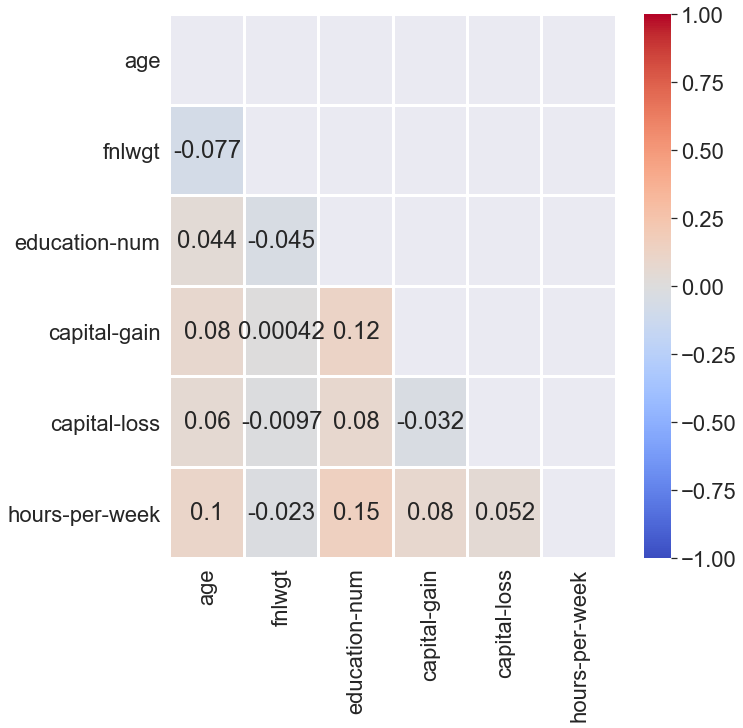

In [15]:
#create and plot correlation matrix
#code taken from module 2 "Regularization_Demo"
corr_matrix=numeric_cols.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_theme(font_scale=2)

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           linewidths=2,
           mask=mask)

plt.show()

None of the numeric variables are strongly (or even moderately) positively or negatively correlated. No variables will need to be dropped to handle multicollinearity.

Next, the categorical variables will be converted into dummies so everything has a numeric representation. I will also do some additional cleaning - there are some inconsistencies in the outcome variables between the train and test sets. The outcome variable will also be moved to the first column.

In [16]:
#convert non-numeric (categorical) variables into dummies
#we will also remove the first column of the dummies (drop_first=True)
#code taken from module 1 "scikit_learn_intro"
for col in adult_train.columns[:-1]:
	attName = col
	dType = adult_train[col].dtype
	missing = pd.isnull(adult_train[col]).any()
	uniqueCount = len(adult_train[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		adult_train = pd.concat([adult_train, pd.get_dummies(adult_train[col], prefix=col, drop_first=True)], axis=1)
		del adult_train[attName]

In [17]:
#convert non-numeric (categorical) variables into dummies
#we will also remove the first column of the dummies (drop_first=True)
#code taken from module 1 "scikit_learn_intro"
for col in adult_test.columns[:-1]:
	attName = col
	dType = adult_test[col].dtype
	missing = pd.isnull(adult_test[col]).any()
	uniqueCount = len(adult_test[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		adult_test = pd.concat([adult_test, pd.get_dummies(adult_test[col], prefix=col, drop_first=True)], axis=1)
		del adult_test[attName]

In [18]:
#noticed the income-group values are different between the train and test dataset
#will strip the period out of the test dataframe
adult_test['income-group'] = adult_test['income-group'].str.rstrip('.')

In [19]:
#next, the target variable (income-group) will be moved to the first position of the dataframe
col_to_move='income-group'
first_col = adult_train.pop(col_to_move)
adult_train.insert(0, col_to_move, first_col)
first_col = adult_test.pop(col_to_move)
adult_test.insert(0, col_to_move, first_col)

In [20]:
#confirm dummy variables created
adult_train.head()

,income-group,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,<=50K,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,<=50K,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,<=50K,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,<=50K,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,<=50K,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#confirm dataframe looks as expected
adult_test.head()

,income-group,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,<=50K,25,226802,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,<=50K,38,89814,9,0,0,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,>50K,28,336951,12,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,>50K,44,160323,10,7688,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,<=50K,34,198693,6,0,0,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
#confirm target variables match
print('Training set: ', adult_train['income-group'].unique())
print('Test set: ', adult_test['income-group'].unique())

Training set:  ['<=50K' '>50K']
Test set:  ['<=50K' '>50K']


In [23]:
#get new size of each dataset (without NaN values, dummies added)
print('Training set: ', adult_train.shape)
print('Test set: ', adult_test.shape)

Training set:  (30162, 97)
Test set:  (15060, 96)


Now the training set has one additional predictor variable - this is likely due to one of the dummies not be present in the test set. After scrolling through, I can see that we're missing the 'native-country_Holand-Netherlands' variable. To make the datasets match I will re-add a column with all 0 values.

In [24]:
#get index of the 'native-country_Holand-Netherlands' column from the training set
#code taken from https://stackoverflow.com/questions/13021654/get-column-index-from-column-name-in-python-pandas
adult_train.columns.get_loc('native-country_Holand-Netherlands')

70

In [25]:
#add new column to test dataframe
#set all the values = 0
adult_test.insert(70, 'native-country_Holand-Netherlands', 0)

In [26]:
#confirm sizes now match
print('Training set: ', adult_train.shape)
print('Test set: ', adult_test.shape)

Training set:  (30162, 97)
Test set:  (15060, 97)


Now that the data has been cleaned up we can do some exploratory data analysis. First I will grab basic stats about the numeric data.

In [27]:
#training set stats (numeric variables)
adult_train[numeric_cols.columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
#test set stats (numeric variables)
adult_test[numeric_cols.columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


We can see that the mean and standard deviations of the numeric variables are pretty similar between the training and testing data sets - this is good because it indicates the sample populations are similar. The ages of the training and test sets range between 17 and 90. The hours worked per week also has the same range for both sets - 1 to 99.

income-group
<=50K           34014
>50K            11208
dtype: int64


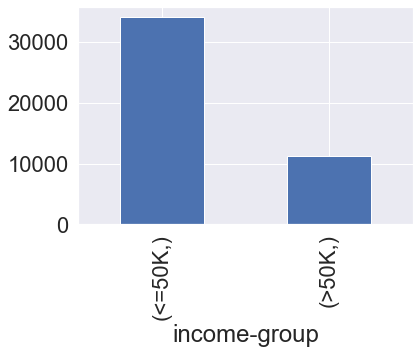

In [29]:
#plot out distribution of income-group
#first we need to combine the total income-group counts into one dataframe
total_inc = pd.DataFrame(columns=['income-group'])
total_inc['income-group'] = total_inc['income-group'].append([adult_train['income-group'],adult_test['income-group']],
                                                             ignore_index=True)
#print(total_inc.shape)
#next, plot the income-group counts
total_inc.value_counts().plot(kind='bar')
print(total_inc.value_counts())

The dataset is not very balanced - the greater-than-50K income group (>50K) contains 11208/45222 = 24.8% of the observations. The less-than-50K group (>=50K) contains 34014/45222 = 75.2% of the observations. This will need to be considered when evaluating the effectiveness of the classification models. Instead of looking at model accuracy it will probably be better to look at a combination of model recall and precision. However, we still need an accuracy greater than 75.2%, since this is the distribution of the current data.

## The Models

Disclaimer: Grid search was not used due to how long it was taking for models to complete - some models were taking 2+ hours. Instead different parameters were manually tested and noted in the comments.

In [30]:
#first, we will create the training and test sets
#since my dataset was already divided I will not require the train_test_split package
features_train = adult_train.iloc[:,1:].values
features_test = adult_test.iloc[:,1:].values
target_train = adult_train.iloc[:,0].values
target_test = adult_test.iloc[:,0].values

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(30162, 96)
(30162,)
(15060, 96)
(15060,)


#### Model 1: KNN

Since the KNN algorithm is based on distance the data must first be scaled.

In [31]:
#KNN model 1 - default parameters
#n_neighbors = 5

#import packages
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#build
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

#train
clf_knn = clf_knn.fit(features_train, target_train)

#validate
target_predicted_knn = clf_knn.predict(features_test)

#scores
print("KNN Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_knn))
print(metrics.classification_report(target_test, target_predicted_knn))
print(metrics.confusion_matrix(target_test, target_predicted_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

KNN Accuracy Score: 0.8187915006640106
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88     11360
        >50K       0.65      0.57      0.61      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.74      0.75     15060
weighted avg       0.81      0.82      0.81     15060

[[10214  1146]
 [ 1583  2117]]
True Negatives:  10214
False Positives:  1146
False Negatives:  1583
True Positives:  2117


This model has a pretty good accuracy (82%) but has poor recall and precision for the positive class (>50K). Here the model only identifies 57% of >50K cases and predicts only 65% correctly.

In [32]:
#KNN model 2
#n_neighbors = 7

#build
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7))

#train
clf_knn = clf_knn.fit(features_train, target_train)

#validate
target_predicted_knn = clf_knn.predict(features_test)

#scores
print("KNN Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_knn))
print(metrics.classification_report(target_test, target_predicted_knn))
print(metrics.confusion_matrix(target_test, target_predicted_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

KNN Accuracy Score: 0.8204515272244356
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88     11360
        >50K       0.65      0.57      0.61      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.74      0.75     15060
weighted avg       0.81      0.82      0.82     15060

[[10237  1123]
 [ 1581  2119]]
True Negatives:  10237
False Positives:  1123
False Negatives:  1581
True Positives:  2119


The number of neighbors was increased from 5 to 7 for the second model. The overall accuracy increased but the recall and precision for the positive class remained the same as before.

In [33]:
#KNN model 3
#n_neighbors = 3

#build
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

#train
clf_knn = clf_knn.fit(features_train, target_train)

#validate
target_predicted_knn = clf_knn.predict(features_test)

#scores
print("KNN Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_knn))
print(metrics.classification_report(target_test, target_predicted_knn))
print(metrics.confusion_matrix(target_test, target_predicted_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

KNN Accuracy Score: 0.8085657370517928
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.87     11360
        >50K       0.62      0.57      0.59      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.73      0.73     15060
weighted avg       0.80      0.81      0.81     15060

[[10082  1278]
 [ 1605  2095]]
True Negatives:  10082
False Positives:  1278
False Negatives:  1605
True Positives:  2095


Here the number of neighbors was dropped down to 3. This resulted in a worse model than either of the previous two. Reducing the number of neighbors too low also risks overfitting.

#### Model 2: Decision Tree

Since decision trees are not linear/distance based scaling is not required.

In [34]:
#DT model 1 - default parameters

#import packages
from sklearn import tree

#build
clf_dt = tree.DecisionTreeClassifier(random_state=0)

#train
clf_dt = clf_dt.fit(features_train, target_train)

#validate
target_predicted_dt = clf_dt.predict(features_test)

#scores
print("DT Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_dt))
print(metrics.classification_report(target_test, target_predicted_dt))
print(metrics.confusion_matrix(target_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#get DT depth
print("DT depth: ", clf_dt.get_depth())

DT Accuracy Score: 0.8090969455511288
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87     11360
        >50K       0.61      0.62      0.62      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.75      0.74     15060
weighted avg       0.81      0.81      0.81     15060

[[9888 1472]
 [1403 2297]]
True Negatives:  9888
False Positives:  1472
False Negatives:  1403
True Positives:  2297
DT depth:  51


The first DT model was trained using default values. The accuracy, while not as high as KNN, was still ok at 81%. The recall for the >50K class did increase to 62% identified, but precision is still pretty low at only 61% correctly predicted. We can also see in the output that this tree had a depth of 51. Maybe trimming this down will help?

In [35]:
#DT model 2
#max_depth = 40, criterion = "entropy"

#build
clf_dt = tree.DecisionTreeClassifier(max_depth=40, criterion="entropy", random_state=0)

#train
clf_dt = clf_dt.fit(features_train, target_train)

#validate
target_predicted_dt = clf_dt.predict(features_test)

#scores
print("DT Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_dt))
print(metrics.classification_report(target_test, target_predicted_dt))
print(metrics.confusion_matrix(target_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#get DT depth
print("DT depth: ", clf_dt.get_depth())

DT Accuracy Score: 0.8097609561752988
              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87     11360
        >50K       0.61      0.61      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060

[[9922 1438]
 [1427 2273]]
True Negatives:  9922
False Positives:  1438
False Negatives:  1427
True Positives:  2273
DT depth:  40


The splitting criterion was changed for the second model from gini to entropy. The model depth was also reduced to 40, which can help prevent overfitting. This resulted in the same accuracy and precision but a slightly lower recall at 61%.

In [36]:
#DT model 3
#max_depth = 20, criterion = "entropy", min_samples_split = 50

#build
clf_dt = tree.DecisionTreeClassifier(max_depth=20, criterion="entropy", min_samples_split=50, random_state=0)

#train
clf_dt = clf_dt.fit(features_train, target_train)

#validate
target_predicted_dt = clf_dt.predict(features_test)

#scores
print("DT Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_dt))
print(metrics.classification_report(target_test, target_predicted_dt))
print(metrics.confusion_matrix(target_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#get DT depth
print("DT depth: ", clf_dt.get_depth())

DT Accuracy Score: 0.8462815405046481
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11360
        >50K       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

[[10457   903]
 [ 1412  2288]]
True Negatives:  10457
False Positives:  903
False Negatives:  1412
True Positives:  2288
DT depth:  20


The final DT model was trained with criterion of entropy (similar to the 2nd model). The depth was decreased even further from 40 to 20. Finally, the minimum samples required to split was increased from 2 (the default) to 50. The result was a more accurate model (85%), slight higher precision (72%) and the same recall (62%). This model is not great but better than the previous ones.

#### Model 3: Random Forest

Again, since this is not a linear/distance based model scaling will not be required.

In [37]:
#RF model 1 - default parameters

#import packages
from sklearn.ensemble import RandomForestClassifier

#build
clf_rf = RandomForestClassifier(random_state=0)

#train
clf_rf = clf_rf.fit(features_train, target_train)

#validate
target_predicted_rf = clf_rf.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_rf))
print(metrics.classification_report(target_test, target_predicted_rf))
print(metrics.confusion_matrix(target_test, target_predicted_rf))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.846547144754316
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11360
        >50K       0.72      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

[[10478   882]
 [ 1429  2271]]
True Negatives:  10478
False Positives:  882
False Negatives:  1429
True Positives:  2271


The default random forest parameters do pretty well here (when compared to previous models). The results are in-line with the tuned DT model at 85% accuracy. This model identified 61% of the positive class and predicted 72%. Not a great model but one of the better ones so far.

In [38]:
#find avg of max_depth, will be used for tuning
#code taken from https://stackoverflow.com/questions/34214087/how-do-you-access-tree-depth-in-pythons-scikit-learn
counter = 0
running_total = 0
for estimator in clf_rf.estimators_:
    running_total = running_total + estimator.tree_.max_depth
    counter = counter + 1
    
print('Avg Depth: ', round(running_total/counter))

Avg Depth:  57


In [39]:
#RF model - will use grid search to tune this model's n_estimators
#some code taken from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#will also use modify grid search to use recall score

#import packages
from sklearn.model_selection import GridSearchCV

#build
clf_rf = RandomForestClassifier(random_state=0)
scorer = metrics.make_scorer(metrics.recall_score, pos_label='>50K')

#define parameters to test
n_estimators = list(np.arange(10, 210, 10))

#define param_grid for grid search
param_grid = {'n_estimators':n_estimators}

#run grid search
grid_search = GridSearchCV(clf_rf, param_grid=param_grid,n_jobs=-1,cv=5,scoring=scorer)
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]},
             scoring=make_scorer(recall_score, pos_label=>50K))

In [40]:
#get best grid search parameter
print("Best Score", grid_search.best_score_)
print("Best", grid_search.best_params_)

Best Score 0.6286644234513875
Best {'n_estimators': 120}


In [41]:
#RF model 2
#n_estimators = 120

#build
clf_rf = RandomForestClassifier(random_state=0, n_estimators=120)

#train
clf_rf = clf_rf.fit(features_train, target_train)

#validate
target_predicted_rf = clf_rf.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_rf))
print(metrics.classification_report(target_test, target_predicted_rf))
print(metrics.confusion_matrix(target_test, target_predicted_rf))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8461487383798141
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11360
        >50K       0.72      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

[[10473   887]
 [ 1430  2270]]
True Negatives:  10473
False Positives:  887
False Negatives:  1430
True Positives:  2270


Grid search was used for the second model to attempt to tune the number of estimators parameter - this is the number of trees in the forest. The resulting model was about the same as the first RF model.

In [42]:
#RF model 3
#criterion = "entropy"

#build
clf_rf = RandomForestClassifier(random_state=0, n_estimators=120, criterion="entropy")

#train
clf_rf = clf_rf.fit(features_train, target_train)

#validate
target_predicted_rf = clf_rf.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_rf))
print(metrics.classification_report(target_test, target_predicted_rf))
print(metrics.confusion_matrix(target_test, target_predicted_rf))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8471447543160691
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11360
        >50K       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

[[10480   880]
 [ 1422  2278]]
True Negatives:  10480
False Positives:  880
False Negatives:  1422
True Positives:  2278


The final RF model was switched from gini to entropy splitter criterion. The resulting model had slightly higher accuracy and recall than the first two, but is still about the same as the best DT model. Only 62% of the >50K class was identified and 72% predicted correctly.

#### Model 4: SVM (Linear Kernel)

Support vector machine models are distance based, therefore scaling is required.

In [43]:
#SVM_LK model 1 - default parameters

#import packages
from sklearn.svm import SVC

#build
clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='linear'))

#train
clf_linearSVC = clf_linearSVC.fit(features_train, target_train)

#validate
target_predicted_linearSVC = clf_linearSVC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_linearSVC))
print(metrics.classification_report(target_test, target_predicted_linearSVC))
print(metrics.confusion_matrix(target_test, target_predicted_linearSVC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_linearSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8464807436918991
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.74      0.58      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060

[[10596   764]
 [ 1548  2152]]
True Negatives:  10596
False Positives:  764
False Negatives:  1548
True Positives:  2152


This model used default parameter values. The accuracy is pretty good at 85% - similar to other models. The precision is also higher at 74% of the positive class predicted. However, recall is pretty low at only 58% of the positive class identified, resulting in a poor model overall.

In [44]:
#SVM_LK model 2
#class_weight = "balanced"

#build
clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight='balanced'))

#train
clf_linearSVC = clf_linearSVC.fit(features_train, target_train)

#validate
target_predicted_linearSVC = clf_linearSVC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_linearSVC))
print(metrics.classification_report(target_test, target_predicted_linearSVC))
print(metrics.confusion_matrix(target_test, target_predicted_linearSVC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_linearSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.7887118193891103
              precision    recall  f1-score   support

       <=50K       0.94      0.77      0.85     11360
        >50K       0.54      0.86      0.67      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.81      0.76     15060
weighted avg       0.85      0.79      0.80     15060

[[8695 2665]
 [ 517 3183]]
True Negatives:  8695
False Positives:  2665
False Negatives:  517
True Positives:  3183


Since my data is not balanced I decided to change the class_weight parameter to balanced. This will adjust the weights to be better proportioned to the class frequencies. The resulting model actually had worse accuracy (only 79%) and precision (only 54%) but had great recall at 86%. However, due to the low precision this is not a very good model.

In [45]:
#SVM_LK model - will use grid search to tune this model's C parameter
#will also use modify grid search to use recall score

#build
#clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight='balanced'))
#scorer = metrics.make_scorer(metrics.recall_score, pos_label='>50K')

#define parameters to test
#C = [0.1, 0.5]

#define param_grid for grid search
#param_grid = {'C':C}

#run grid search
#note - due to how long this model takes to run, cv reduced from 5 to 3
#n_jobs = -2 uses all but 1 CPU
#grid_search = GridSearchCV(clf_linearSVC['svc'], param_grid=param_grid,n_jobs=-2,cv=3,scoring=scorer)
#grid_search.fit(features_train, target_train)

Output from above:
(this grid search took 2+ hours so it was not re-run)

GridSearchCV(cv=3, estimator=SVC(class_weight='balanced', kernel='linear'),
             n_jobs=-2, param_grid={'C': [0.1, 0.5]},
             scoring=make_scorer(recall_score, pos_label=>50K))

In [46]:
#get best grid search parameter
#print("Scores", grid_search.cv_results_)
#print("Best Score", grid_search.best_score_)
#print("Best", grid_search.best_params_)

Results from above:
(this grid search took 2+ hours so it was not re-run)

Scores {'mean_fit_time': array([3953.03323118, 4381.72333439]), 'std_fit_time': array([427.8688763 , 476.00041536]), 'mean_score_time': array([23.28372049, 19.40571936]), 'std_score_time': array([2.13467588, 3.76091124]), 'param_C': masked_array(data=[0.1, 0.5],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1}, {'C': 0.5}], 'split0_test_score': array([0.70943245, 0.69344524]), 'split1_test_score': array([0.73871354, 0.75029964]), 'split2_test_score': array([0.73351978, 0.747503  ]), 'mean_test_score': array([0.72722192, 0.73041596]), 'std_test_score': array([0.01275651, 0.02616716]), 'rank_test_score': array([2, 1])}
Best Score 0.7304159602135843
Best {'C': 0.5}

In [47]:
#SVM_LK model 3
#class_weight = "balanced", C = 0.5

#build
clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight='balanced', C=0.5))

#train
clf_linearSVC = clf_linearSVC.fit(features_train, target_train)

#validate
target_predicted_linearSVC = clf_linearSVC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_linearSVC))
print(metrics.classification_report(target_test, target_predicted_linearSVC))
print(metrics.confusion_matrix(target_test, target_predicted_linearSVC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_linearSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.7887118193891103
              precision    recall  f1-score   support

       <=50K       0.94      0.77      0.85     11360
        >50K       0.54      0.86      0.67      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.81      0.76     15060
weighted avg       0.85      0.79      0.80     15060

[[8696 2664]
 [ 518 3182]]
True Negatives:  8696
False Positives:  2664
False Negatives:  518
True Positives:  3182


Grid search was used to attempt to tune the C parameter for the final SVM model. As noted above this process took quite a while to complete which is why more values were not tested. This parameter adjusts the soft margin used in the model which defines the support vectors created (and how the data is trained). In this case it was shown that 0.5 was the optimal value (default = 1). The resulting model, however, was not any different in terms of predictive power than the previous model.

#### Model 5: SVM (RBF Kernel)

SVMs require scaling.

In [48]:
#SVM_RK model 1
#class_weight = "balanced", C = 2

#build
clf_rbkSVC = make_pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='balanced', C=2))

#train
clf_rbkSVC = clf_rbkSVC.fit(features_train, target_train)

#validate
target_predicted_rbkSVC = clf_rbkSVC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_rbkSVC))
print(metrics.classification_report(target_test, target_predicted_rbkSVC))
print(metrics.confusion_matrix(target_test, target_predicted_rbkSVC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_rbkSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.799601593625498
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86     11360
        >50K       0.56      0.84      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060

[[8952 2408]
 [ 610 3090]]
True Negatives:  8952
False Positives:  2408
False Negatives:  610
True Positives:  3090


This model was set up similar to the linear SVM models. A C value of 2 was used and class_weight set to balanced. The resulting model was slightly more accurate than linear SVM at 80%. However, precision did not change and recall dropped from 86% to 84%. This recall value is still pretty good but when paired with the low precision this is not a good model.

In [57]:
#SVM_RK model 2
#gamma = 0.01
#NOTE: also tried gamma = 1 and gamma = 0.1, this model was the best

#build
clf_rbkSVC = make_pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='balanced', C=2, gamma=0.01))

#train
clf_rbkSVC = clf_rbkSVC.fit(features_train, target_train)

#validate
target_predicted_rbkSVC = clf_rbkSVC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_rbkSVC))
print(metrics.classification_report(target_test, target_predicted_rbkSVC))
print(metrics.confusion_matrix(target_test, target_predicted_rbkSVC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_rbkSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.7990039840637451
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86     11360
        >50K       0.56      0.84      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060

[[8943 2417]
 [ 610 3090]]
True Negatives:  8943
False Positives:  2417
False Negatives:  610
True Positives:  3090


The gamma parameter was tuned in the second radial kernel model. This value is used for non-linear hyperplanes. It was determined that gamma = 0.01 was the optimal value. Due to the low value overfitting should not be much of a concern. The resulting model was not any better than the first model.

In [58]:
#SVM_RK model 3
#gamma = 0.001

#build
clf_rbkSVC = make_pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='balanced', C=2, gamma=0.001))

#train
clf_rbkSVC = clf_rbkSVC.fit(features_train, target_train)

#validate
target_predicted_rbkSVC = clf_rbkSVC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_rbkSVC))
print(metrics.classification_report(target_test, target_predicted_rbkSVC))
print(metrics.confusion_matrix(target_test, target_predicted_rbkSVC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_rbkSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.7875166002656042
              precision    recall  f1-score   support

       <=50K       0.94      0.76      0.84     11360
        >50K       0.54      0.86      0.66      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.81      0.75     15060
weighted avg       0.84      0.79      0.80     15060

[[8687 2673]
 [ 527 3173]]
True Negatives:  8687
False Positives:  2673
False Negatives:  527
True Positives:  3173


The third model used an even further reduced gamma value. Similar to before, this model showed no improvement. Overall, this kernel did not produce very good results.

#### Model 6: Stochastic Gradient Descent

SGD is also linear-based, scaling will be required.

In [59]:
#SGD model 1 - default parameters

#import packages
from sklearn.linear_model import SGDClassifier

#build
clf_SGD = make_pipeline(StandardScaler(), SGDClassifier(random_state=0))

#train
clf_SGD = clf_SGD.fit(features_train, target_train)

#validate
target_predicted_SGD = clf_SGD.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_SGD))
print(metrics.classification_report(target_test, target_predicted_SGD))
print(metrics.confusion_matrix(target_test, target_predicted_SGD))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_SGD).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8382470119521912
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90     11360
        >50K       0.70      0.60      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.76      0.77     15060
weighted avg       0.83      0.84      0.83     15060

[[10421   939]
 [ 1497  2203]]
True Negatives:  10421
False Positives:  939
False Negatives:  1497
True Positives:  2203


The first SGD model was built using default parameters. This model had 84% accuracy. The positive class (>50K) was identified correctly 60% of the time and correctly predicted 70% of the time. This model is not the best, but is in-line with some of the DT and RF models.

In [65]:
#SGD model 2
#loss = "log"
#NOTE: also tried loss = "modified_huber" with and without class_weight = "balanced"

#build
clf_SGD = make_pipeline(StandardScaler(), SGDClassifier(random_state=0, loss="log"))

#train
clf_SGD = clf_SGD.fit(features_train, target_train)

#validate
target_predicted_SGD = clf_SGD.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_SGD))
print(metrics.classification_report(target_test, target_predicted_SGD))
print(metrics.confusion_matrix(target_test, target_predicted_SGD))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_SGD).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8426958831341301
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11360
        >50K       0.71      0.60      0.65      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.76      0.78     15060
weighted avg       0.84      0.84      0.84     15060

[[10465   895]
 [ 1474  2226]]
True Negatives:  10465
False Positives:  895
False Negatives:  1474
True Positives:  2226


Different loss functions were attempted in the second model. The log loss function (equivalent to logistic regression) ended up producing a model with slightly better accuracy and precision than the first. However, this model is still not great. Precision only increased by 1% and recall did not improve.

In [64]:
#SGD model 3
#loss = "log", class_weight = "balanced"

#build
clf_SGD = make_pipeline(StandardScaler(), SGDClassifier(random_state=0, class_weight="balanced", loss="log"))

#train
clf_SGD = clf_SGD.fit(features_train, target_train)

#validate
target_predicted_SGD = clf_SGD.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_SGD))
print(metrics.classification_report(target_test, target_predicted_SGD))
print(metrics.confusion_matrix(target_test, target_predicted_SGD))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_SGD).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.7980079681274901
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.85     11360
        >50K       0.56      0.84      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060

[[8923 2437]
 [ 605 3095]]
True Negatives:  8923
False Positives:  2437
False Negatives:  605
True Positives:  3095


For the final model class_weight of balanced was used to change the class weights. This model, similar to the SVM models, had slightly lower accuracy (only 80%) but an increased recall of 84%. Also similar to the SVM models, the precision was too low (56%) to be considered good. These models seem to have a hard time balancing precision and recall for the positive class.

#### 7. Adaboost (with 2 learners)

Since we are using the random forest classifier with adaboost, scaling is not required.

In [70]:
#Adaboost model 1 - default parameters

#import packages
from sklearn.ensemble import AdaBoostClassifier

#build
clf_ADA = AdaBoostClassifier(RandomForestClassifier(max_depth=1, criterion="entropy"), random_state=0)

#train
clf_ADA = clf_ADA.fit(features_train, target_train)

#validate
target_predicted_ADA = clf_ADA.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ADA))
print(metrics.classification_report(target_test, target_predicted_ADA))
print(metrics.confusion_matrix(target_test, target_predicted_ADA))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ADA).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8573705179282869
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11360
        >50K       0.77      0.60      0.67      3700

    accuracy                           0.86     15060
   macro avg       0.82      0.77      0.79     15060
weighted avg       0.85      0.86      0.85     15060

[[10699   661]
 [ 1487  2213]]
True Negatives:  10699
False Positives:  661
False Negatives:  1487
True Positives:  2213


Random forest was chosen for the base estimator due to it having the best results so far. This model was trained with a max depth of 1. This max depth is used due to the requirement of having weak learners. Criterion of entropy was selected due to it showing slight improvement over gini in the original DT/RF models.

The resulting model was one of the most accurate so far at 86%. This model also correctly identifed the positive class 60% of the time and predicted correctly 77% of the time. While the recall is a little lower than the DT/RF models, the accuracy and precision are turning in the right direction.

In [71]:
#Adaboost model 2
#max_depth = 10

#build
clf_ADA = AdaBoostClassifier(RandomForestClassifier(criterion="entropy", max_depth=10), random_state=0)

#train
clf_ADA = clf_ADA.fit(features_train, target_train)

#validate
target_predicted_ADA = clf_ADA.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ADA))
print(metrics.classification_report(target_test, target_predicted_ADA))
print(metrics.confusion_matrix(target_test, target_predicted_ADA))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ADA).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8632138114209827
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     11360
        >50K       0.76      0.65      0.70      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.79      0.81     15060
weighted avg       0.86      0.86      0.86     15060

[[10611   749]
 [ 1311  2389]]
True Negatives:  10611
False Positives:  749
False Negatives:  1311
True Positives:  2389


The max_depth was increased in this model to 10. The resulting model has improved recall over the previous at 65%. The precision did drop 1% but this is pretty negligible. While this is probably one of the better models generated, I'm still not sure if it is a great model. Since the classes are not balanced it would be nice to get a higher recall for the positive class.

In [75]:
#Adaboost model 3
#learning_rate = 0.5
#NOTE: also tried learning_rate = 0.1 and learning_rate = 0.01

#build
clf_ADA = AdaBoostClassifier(RandomForestClassifier(criterion="entropy", max_depth=10), random_state=0, learning_rate=0.5)

#train
clf_ADA = clf_ADA.fit(features_train, target_train)

#validate
target_predicted_ADA = clf_ADA.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ADA))
print(metrics.classification_report(target_test, target_predicted_ADA))
print(metrics.confusion_matrix(target_test, target_predicted_ADA))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ADA).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8662682602921646
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91     11360
        >50K       0.77      0.65      0.70      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.79      0.81     15060
weighted avg       0.86      0.87      0.86     15060

[[10642   718]
 [ 1296  2404]]
True Negatives:  10642
False Positives:  718
False Negatives:  1296
True Positives:  2404


Learning rates were adjusted for this model. The learning rate determines the weight applied to each classifier during boosting. A rate of 0.5 was found to have the highest accuracy and increased the precision back up to 77%. Recall, however, did not improve from 65%. Again, this model is one of the better ones so far but not necessarily great.

#### 8. Bagging Classifier (with at least 1 learner)

Since the default base classifier is a decision tree scaling is not needed.

In [76]:
#Bagging model 1 - default parameters

#import packages
from sklearn.ensemble import BaggingClassifier

#build
clf_BAG = BaggingClassifier(random_state=0)

#train
clf_BAG = clf_BAG.fit(features_train, target_train)

#validate
target_predicted_BAG = clf_BAG.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_BAG))
print(metrics.classification_report(target_test, target_predicted_BAG))
print(metrics.confusion_matrix(target_test, target_predicted_BAG))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_BAG).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8443559096945551
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.73      0.58      0.65      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.76      0.77     15060
weighted avg       0.84      0.84      0.84     15060

[[10552   808]
 [ 1536  2164]]
True Negatives:  10552
False Positives:  808
False Negatives:  1536
True Positives:  2164


As with most of the other models, this one was first built using default values. This model has good accuracy but the recall is significantly less than some of the better models at 58%. 

In [79]:
#Bagging model 2
#n_estimators = 200
#NOTE: also tried n_estimators = 50 and n_estimators = 100

#build
clf_BAG = BaggingClassifier(random_state=0, n_estimators=200)

#train
clf_BAG = clf_BAG.fit(features_train, target_train)

#validate
target_predicted_BAG = clf_BAG.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_BAG))
print(metrics.classification_report(target_test, target_predicted_BAG))
print(metrics.confusion_matrix(target_test, target_predicted_BAG))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_BAG).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8482735723771581
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11360
        >50K       0.73      0.62      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

[[10497   863]
 [ 1422  2278]]
True Negatives:  10497
False Positives:  863
False Negatives:  1422
True Positives:  2278


The number of estimators (or number of trees) was tuned in the second model. The default n_estimators value is 10. It was determined that 200 estimators provided a better model with 85% accuracy. The positive class was correctly identified 62% of the time and correctly predicted 73% of the time. This model is not quite as good as the AdaBoost models.

In [80]:
#Bagging model 3
#base_estimator = RandomForestClassifier, n_estimators=200

#build
clf_BAG = BaggingClassifier(base_estimator=RandomForestClassifier(criterion="entropy"), random_state=0, n_estimators=200)

#train
clf_BAG = clf_BAG.fit(features_train, target_train)

#validate
target_predicted_BAG = clf_BAG.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_BAG))
print(metrics.classification_report(target_test, target_predicted_BAG))
print(metrics.confusion_matrix(target_test, target_predicted_BAG))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_BAG).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.852722443559097
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     11360
        >50K       0.74      0.62      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.77      0.79     15060
weighted avg       0.85      0.85      0.85     15060

[[10547   813]
 [ 1405  2295]]
True Negatives:  10547
False Positives:  813
False Negatives:  1405
True Positives:  2295


For the final model the base_estimator was changed to Random Forest since we had some success earlier. The number of estimators did not change from model 2. This model is slightly better than the DT model in terms of the metrics but still not as good as AdaBoost.

#### 9. Gradient Boosting

Gradient boosting does not require scaling since it uses trees.

In [81]:
#Gradient Boosting model 1 - default parameters

#import packages
from sklearn.ensemble import GradientBoostingClassifier

#build
clf_GBC = GradientBoostingClassifier(random_state=0)

#train
clf_GBC = clf_GBC.fit(features_train, target_train)

#validate
target_predicted_GBC = clf_GBC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_GBC))
print(metrics.classification_report(target_test, target_predicted_GBC))
print(metrics.confusion_matrix(target_test, target_predicted_GBC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_GBC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8664010624169987
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11360
        >50K       0.79      0.62      0.70      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.78      0.80     15060
weighted avg       0.86      0.87      0.86     15060

[[10755   605]
 [ 1407  2293]]
True Negatives:  10755
False Positives:  605
False Negatives:  1407
True Positives:  2293


The first model, ran with defaults, resulted in a fairly accurate and precise model. At 79% precision, this is the highest so far. The recall is very average though, only at 62%.

In [82]:
#Gradient Boosting model 2
#n_estimators = 1000

#build
clf_GBC = GradientBoostingClassifier(random_state=0, n_estimators=1000)

#train
clf_GBC = clf_GBC.fit(features_train, target_train)

#validate
target_predicted_GBC = clf_GBC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_GBC))
print(metrics.classification_report(target_test, target_predicted_GBC))
print(metrics.confusion_matrix(target_test, target_predicted_GBC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_GBC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8702523240371846
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92     11360
        >50K       0.77      0.67      0.72      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.80      0.82     15060
weighted avg       0.87      0.87      0.87     15060

[[10639   721]
 [ 1233  2467]]
True Negatives:  10639
False Positives:  721
False Negatives:  1233
True Positives:  2467


The number of trees (n_estimators) was tuned for the second model. The docs for this algorithm state that gradient boosting is fairly robust to overfitting so large numbers of trees tend to perform pretty well. In this stage the number of trees was increased 10-fold from 100 to 1000. The resulting model has the highest accuracy and recall seen so far at 87% and 67%, respectively. While the highest recall yet, this model may still not be considered "great".

Disclaimer: some of the SVM models actually had higher recall but the precision was VERY poor and therefore not considered.

In [83]:
#Gradient Boosting model 3
#n_estimators = 1000, learning_rate = 0.05
#NOTE: also tried learning_rate = 0.01

#build
clf_GBC = GradientBoostingClassifier(random_state=0, n_estimators=1000, learning_rate=0.05)

#train
clf_GBC = clf_GBC.fit(features_train, target_train)

#validate
target_predicted_GBC = clf_GBC.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_GBC))
print(metrics.classification_report(target_test, target_predicted_GBC))
print(metrics.confusion_matrix(target_test, target_predicted_GBC))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_GBC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8712483399734395
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92     11360
        >50K       0.78      0.66      0.72      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.80      0.82     15060
weighted avg       0.87      0.87      0.87     15060

[[10685   675]
 [ 1264  2436]]
True Negatives:  10685
False Positives:  675
False Negatives:  1264
True Positives:  2436


The learning rate was adjusted for the final model. The docs state that this parameter has a trade off with the number of trees. The resulting model was about the same as the previous.

#### 10. Extra Trees

No scaling is required for Extra Trees.

In [88]:
#Extra Trees model 1 - default parameters

#import packages
from sklearn.ensemble import ExtraTreesClassifier

#build
clf_ext = ExtraTreesClassifier(random_state=0, n_jobs=-2)

#train
clf_ext = clf_ext.fit(features_train, target_train)

#validate
target_predicted_ext = clf_ext.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ext))
print(metrics.classification_report(target_test, target_predicted_ext))
print(metrics.confusion_matrix(target_test, target_predicted_ext))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ext).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8283532536520585
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89     11360
        >50K       0.67      0.60      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.83     15060

[[10255  1105]
 [ 1480  2220]]
True Negatives:  10255
False Positives:  1105
False Negatives:  1480
True Positives:  2220


Extra trees did not perform as well as some of the other tests. It only correctly identified 60% of the positive class (>50K) and of those only 67% were correctly predicted. This model is poor.

In [103]:
#Extra Trees model 2
#class_weight = "balanced"
#NOTE: also tried criterion = "entropy"

#build
clf_ext = ExtraTreesClassifier(random_state=0, n_jobs=-2, class_weight="balanced")

#train
clf_ext = clf_ext.fit(features_train, target_train)

#validate
target_predicted_ext = clf_ext.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ext))
print(metrics.classification_report(target_test, target_predicted_ext))
print(metrics.confusion_matrix(target_test, target_predicted_ext))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ext).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8260956175298805
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89     11360
        >50K       0.66      0.59      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.82     15060

[[10258  1102]
 [ 1517  2183]]
True Negatives:  10258
False Positives:  1102
False Negatives:  1517
True Positives:  2183


A balanced class weight was used for this model. For this case balance the weights did not help and resulted in a worse model.

In [109]:
#Extra Trees model 3
#max_depth = 50
#NOTE: also tried max_depth = 5, 10, 15, 35, 60

#build
clf_ext = ExtraTreesClassifier(random_state=0, n_jobs=-2, max_depth=50)

#train
clf_ext = clf_ext.fit(features_train, target_train)

#validate
target_predicted_ext = clf_ext.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ext))
print(metrics.classification_report(target_test, target_predicted_ext))
print(metrics.confusion_matrix(target_test, target_predicted_ext))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ext).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8291500664010624
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89     11360
        >50K       0.67      0.60      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.83     15060

[[10263  1097]
 [ 1476  2224]]
True Negatives:  10263
False Positives:  1097
False Negatives:  1476
True Positives:  2224


The max_depth was parameter was tuned for the final model since this parameter helped with previous tree models. Multiple values were tried but max_depth of 50 seemed to have the best results. This model has metrics consistent with the previous two models and is not very good.

#### 11. ANN (with different hidden layers and nodes)

Neural networks do require scaling.

In [113]:
#ANN model 1
#hidden_layer_sizes = (5)
#hidden_layer_sizes format (x, y) where x = number of nodes in a hidden layer and y = number of hidden layers (1 if omitted)
#NOTE: max_iter increased due to convergence error

#import packages
from sklearn.neural_network import MLPClassifier

#build
clf_ann = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, max_iter=500, hidden_layer_sizes=5))

#train
clf_ann = clf_ann.fit(features_train, target_train)

#validate
target_predicted_ann = clf_ann.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ann))
print(metrics.classification_report(target_test, target_predicted_ann))
print(metrics.confusion_matrix(target_test, target_predicted_ann))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ann).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.848937583001328
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     11360
        >50K       0.73      0.61      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

[[10520   840]
 [ 1435  2265]]
True Negatives:  10520
False Positives:  840
False Negatives:  1435
True Positives:  2265


This model was built using a hidden layer with 5 nodes. The model has 85% accuracy. 67% of the >50K class was correctly identified and 73% of those were correctly predicted. This model is not one of the best but is fairly consistent with the other "average" ranked models.

In [114]:
#ANN model 2
#hidden_layer_sizes=(5,2)

#build
clf_ann = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, max_iter=500, hidden_layer_sizes=(5,2)))

#train
clf_ann = clf_ann.fit(features_train, target_train)

#validate
target_predicted_ann = clf_ann.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ann))
print(metrics.classification_report(target_test, target_predicted_ann))
print(metrics.confusion_matrix(target_test, target_predicted_ann))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ann).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.850597609561753
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90     11360
        >50K       0.72      0.64      0.68      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.78      0.79     15060
weighted avg       0.85      0.85      0.85     15060

[[10435   925]
 [ 1325  2375]]
True Negatives:  10435
False Positives:  925
False Negatives:  1325
True Positives:  2375


An additional hidden layer of 5 nodes was added to the second model. The resulting model saw increased recall (64%) with minimal precision trade-off (reduced from 73% to 72%). This is one of the higher recall values but AdaBoost preformed a litte better.

In [117]:
#ANN model 3
#hidden_layer_sizes = (20)
#NOTE: also tried hidden_layer_sizes = (10), (5,3)

#build
clf_ann = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, max_iter=500, hidden_layer_sizes=(20)))

#train
clf_ann = clf_ann.fit(features_train, target_train)

#validate
target_predicted_ann = clf_ann.predict(features_test)

#scores
print("RF Accuracy Score:", metrics.accuracy_score(target_test, target_predicted_ann))
print(metrics.classification_report(target_test, target_predicted_ann))
print(metrics.confusion_matrix(target_test, target_predicted_ann))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = metrics.confusion_matrix(target_test, target_predicted_ann).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

RF Accuracy Score: 0.8422974767596282
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90     11360
        >50K       0.70      0.62      0.66      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.77      0.78     15060
weighted avg       0.84      0.84      0.84     15060

[[10377   983]
 [ 1392  2308]]
True Negatives:  10377
False Positives:  983
False Negatives:  1392
True Positives:  2308


Additional hidden layer sizes were tuned for the final model. The end result was not as good as the previous model using 2 5-node hidden layers.

#### 12. Stacking

Stacking itself does not require scaling but the individual learners may, depending on which model is used.

In [139]:
#Stacking model 1 - default values from Module 4 example notebook
#NOTE: max_iter increased to 500 for learner_1 due to convergence error

#import packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

#hitting pos_label error -> need to transform the target_train set into binary
#some code taken from https://stackoverflow.com/questions/27357121/scikit-calculate-precision-and-recall-using-cross-val-score-function
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ttb = lb.fit_transform(target_train).ravel()

#build/train/validate
learner_1 = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', max_iter=500))
learner_2 = GaussianNB()
learner_3 = RandomForestClassifier(class_weight='balanced', max_features='auto', n_estimators=100)
learner_4 = AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight='balanced'),
                         algorithm="SAMME.R",n_estimators=100)
stacked_learner = VotingClassifier(estimators=[('lr', learner_1), ('nb', learner_2),
                                              ('rf', learner_3), ('adaboost', learner_4)], voting='hard', n_jobs=-2)
for MV, label in zip([learner_1, learner_2, learner_3, learner_4, stacked_learner], 
                     ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'AdaBoost Decision Tree', 'Second Stage Learner']):
    scores_a = cross_val_score(MV, features_train, ttb, cv=5, scoring='accuracy')
    scores_p = cross_val_score(MV, features_train, ttb, cv=5, scoring='precision')
    scores_r = cross_val_score(MV, features_train, ttb, cv=5, scoring='recall')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores_a.mean(), scores_a.std(), label))
    print("Precision: %0.2f (+/- %0.2f) [%s]" % (scores_p.mean(), scores_p.std(), label))
    print("Recall: %0.2f (+/- %0.2f) [%s]" % (scores_r.mean(), scores_r.std(), label))

Accuracy: 0.81 (+/- 0.01) [Logistic Regression]
Precision: 0.58 (+/- 0.01) [Logistic Regression]
Recall: 0.84 (+/- 0.01) [Logistic Regression]
Accuracy: 0.79 (+/- 0.00) [Naive Bayes]
Precision: 0.66 (+/- 0.02) [Naive Bayes]
Recall: 0.31 (+/- 0.01) [Naive Bayes]
Accuracy: 0.85 (+/- 0.00) [Random Forest]
Precision: 0.74 (+/- 0.01) [Random Forest]
Recall: 0.62 (+/- 0.01) [Random Forest]
Accuracy: 0.83 (+/- 0.01) [AdaBoost Decision Tree]
Precision: 0.66 (+/- 0.03) [AdaBoost Decision Tree]
Recall: 0.62 (+/- 0.01) [AdaBoost Decision Tree]
Accuracy: 0.85 (+/- 0.00) [Second Stage Learner]
Precision: 0.78 (+/- 0.02) [Second Stage Learner]
Recall: 0.54 (+/- 0.02) [Second Stage Learner]


This model was built using defaults from the example in the course material. The individual learners used were logistic regression, naive bayes, random forest, and adaboost (using decision trees). This model performed pretty poorly overall with a recall of only 54%.

In [140]:
#Stacking model 2
#removed class_weight="balanced"

#build/train/validate
learner_1 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))
learner_2 = GaussianNB()
learner_3 = RandomForestClassifier(max_features='auto', n_estimators=100)
learner_4 = AdaBoostClassifier(tree.DecisionTreeClassifier(),
                         algorithm="SAMME.R",n_estimators=100)
stacked_learner = VotingClassifier(estimators=[('lr', learner_1), ('nb', learner_2),
                                              ('rf', learner_3), ('adaboost', learner_4)], voting='hard', n_jobs=-2)
for MV, label in zip([learner_1, learner_2, learner_3, learner_4, stacked_learner], 
                     ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'AdaBoost Decision Tree', 'Second Stage Learner']):
    scores_a = cross_val_score(MV, features_train, ttb, cv=5, scoring='accuracy')
    scores_p = cross_val_score(MV, features_train, ttb, cv=5, scoring='precision')
    scores_r = cross_val_score(MV, features_train, ttb, cv=5, scoring='recall')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores_a.mean(), scores_a.std(), label))
    print("Precision: %0.2f (+/- %0.2f) [%s]" % (scores_p.mean(), scores_p.std(), label))
    print("Recall: %0.2f (+/- %0.2f) [%s]" % (scores_r.mean(), scores_r.std(), label))

Accuracy: 0.85 (+/- 0.00) [Logistic Regression]
Precision: 0.74 (+/- 0.01) [Logistic Regression]
Recall: 0.61 (+/- 0.01) [Logistic Regression]
Accuracy: 0.79 (+/- 0.00) [Naive Bayes]
Precision: 0.66 (+/- 0.02) [Naive Bayes]
Recall: 0.31 (+/- 0.01) [Naive Bayes]
Accuracy: 0.85 (+/- 0.00) [Random Forest]
Precision: 0.73 (+/- 0.01) [Random Forest]
Recall: 0.63 (+/- 0.01) [Random Forest]
Accuracy: 0.82 (+/- 0.01) [AdaBoost Decision Tree]
Precision: 0.64 (+/- 0.02) [AdaBoost Decision Tree]
Recall: 0.62 (+/- 0.01) [AdaBoost Decision Tree]
Accuracy: 0.85 (+/- 0.00) [Second Stage Learner]
Precision: 0.82 (+/- 0.01) [Second Stage Learner]
Recall: 0.49 (+/- 0.02) [Second Stage Learner]


The individual learners were kept the same for the second model but the class_weight of balanced was removed. This model performed worse than the previous with only 49% recall. This is the worst so far.

In [142]:
#Stacking model 3
#changed solver = "saga" for LogisticRegresssion
#changed criterion = "entropy" for RandomForest
#added class_weight="balanced" back to AdaBoost
#changed criterion = "entropy" for AdaBoost
#NOTE: max_iter increased to 1000 for learner_1 due to convergence error

#build/train/validate
learner_1 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver="saga"))
learner_2 = GaussianNB()
learner_3 = RandomForestClassifier(max_features='auto', n_estimators=100, criterion="entropy")
learner_4 = AdaBoostClassifier(tree.DecisionTreeClassifier(criterion="entropy", class_weight="balanced"),
                         algorithm="SAMME.R",n_estimators=100)
stacked_learner = VotingClassifier(estimators=[('lr', learner_1), ('nb', learner_2),
                                              ('rf', learner_3), ('adaboost', learner_4)], voting='hard', n_jobs=-2)
for MV, label in zip([learner_1, learner_2, learner_3, learner_4, stacked_learner], 
                     ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'AdaBoost Decision Tree', 'Second Stage Learner']):
    scores_a = cross_val_score(MV, features_train, ttb, cv=5, scoring='accuracy')
    scores_p = cross_val_score(MV, features_train, ttb, cv=5, scoring='precision')
    scores_r = cross_val_score(MV, features_train, ttb, cv=5, scoring='recall')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores_a.mean(), scores_a.std(), label))
    print("Precision: %0.2f (+/- %0.2f) [%s]" % (scores_p.mean(), scores_p.std(), label))
    print("Recall: %0.2f (+/- %0.2f) [%s]" % (scores_r.mean(), scores_r.std(), label))

Accuracy: 0.85 (+/- 0.00) [Logistic Regression]
Precision: 0.74 (+/- 0.01) [Logistic Regression]
Recall: 0.61 (+/- 0.01) [Logistic Regression]
Accuracy: 0.79 (+/- 0.00) [Naive Bayes]
Precision: 0.66 (+/- 0.02) [Naive Bayes]
Recall: 0.31 (+/- 0.01) [Naive Bayes]
Accuracy: 0.85 (+/- 0.00) [Random Forest]
Precision: 0.73 (+/- 0.01) [Random Forest]
Recall: 0.63 (+/- 0.01) [Random Forest]
Accuracy: 0.83 (+/- 0.01) [AdaBoost Decision Tree]
Precision: 0.66 (+/- 0.03) [AdaBoost Decision Tree]
Recall: 0.62 (+/- 0.02) [AdaBoost Decision Tree]
Accuracy: 0.85 (+/- 0.00) [Second Stage Learner]
Precision: 0.82 (+/- 0.02) [Second Stage Learner]
Recall: 0.50 (+/- 0.02) [Second Stage Learner]


Multiple parameters were tuned for this final model based on some of the inputs used for the previous individual models. Saga was chosen for the logistic regression learner based on the docs stating that saga is faster for larger datasets. Again, the resulting model had very poor recall at only 50%. The stacked learners had some of the best precision values (85%) but the poorest recall.

## Results and Conclusion

In [90]:
#create dataframe to store results - this will only store the BEST of the three models based on RECALL (or RECALL + PRECISION)
#some code taken from https://stackoverflow.com/questions/18022845/pandas-index-column-title-or-name

results = pd.DataFrame(index=['KNN','Decision Tree','Random Forest','SVM-Linear','SVM-RBF','Stochastic Gradient Descent',
                             'Adaboost','Bagging Classifier','Gradient Boosting','Extra Trees','ANN','Stacking'],
                      columns=['Accuracy(%)','Precision(%)-(>50K)','Recall(%)-(>50K)'])

results.index.name = 'Classification Model'

In [143]:
#fill the results dataframe with model metrics
results.iloc[0]=[82.0,65,57]
results.iloc[1]=[84.6,72,62]
results.iloc[2]=[84.7,72,62]
results.iloc[3]=[78.9,54,86]
results.iloc[4]=[78.8,54,86]
results.iloc[5]=[79.8,56,84]
results.iloc[6]=[86.6,77,65]
results.iloc[7]=[85.3,74,62]
results.iloc[8]=[87.0,77,67]
results.iloc[9]=[82.9,67,60]
results.iloc[10]=[85.1,72,64]
results.iloc[11]=[85.0,78,54]

In [150]:
#print the results table
results

,Accuracy,Precision (>50K),Recall (>50K)
Classification Model,,,
KNN,82,65,57
Decision Tree,84.6,72,62
Random Forest,84.7,72,62
SVM-Linear,78.9,54,86
SVM-RBF,78.8,54,86
Stochastic Gradient Descent,79.8,56,84
Adaboost,86.6,77,65
Bagging Classifier,85.3,74,62
Gradient Boosting,87,77,67


The above table shows the best of three models for each different model type. While the support vector machine and stochastic gradient descent models had the highest recall (>80%) the very low precision (<60%) makes them poor models for predicting the positive class. The gradient boosting model using 1000 estimators was probably the best overall model at 87% accuracy. This model correctly identified 67% of the >50K cases and correctly predicted 77% of them. While this is the "best" model I would have ideally liked to have a model with recall of >75% and precision of at least 75% for the >50K class due to the data set being quite unbalanced. None of the models had issues predicting the negative class (<=50K).

I think having a more balanced data set would help with future predictions. This data is quite old - taken from a 1994 census - so it would be interesting to predict the same classes on a newer dataset. I think more tuning could have been accomplished as well, had I not been limited by the processing power of my computer. Plugging more parameters into grid search could have helped identify parameters to build better models.